## Data Analysis of My Music Listening Habits

Dataset: My Last.fm scrobbling data

This is an exploratory data analysis of my music listening habits based on my last.fm scrobbles

In [1]:
#import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
scrob = pd.read_csv("./data/last_fm_stats.csv", header=None)
scrob.head()

,0,1,2,3
0,Pretend,Bones in the Soil Rust in the Oil,Legs To Walk Us To Drop Us,07 Jan 2023 00:08
1,Pretend,Bones in the Soil Rust in the Oil,Those Luminous Noises Are God,07 Jan 2023 00:00
2,The Velvet Underground & Nico,The Velvet Underground & Nico,Heroin,06 Jan 2023 19:41
3,Origami Angel,Somewhere City,The Air Up Here,06 Jan 2023 19:34
4,Sun Kil Moon,Ghosts of the Great Highway,Carry Me Ohio,03 Jan 2023 01:49


The dataset does not have a header and uses a numeric index. I will replace these with something that suitably identifies the data.

In [3]:
scrob.rename(columns = {0: 'Artist', 1: 'Album', 2: 'Track', 3: 'Date'}, inplace=True)
scrob.head()

,Artist,Album,Track,Date
0,Pretend,Bones in the Soil Rust in the Oil,Legs To Walk Us To Drop Us,07 Jan 2023 00:08
1,Pretend,Bones in the Soil Rust in the Oil,Those Luminous Noises Are God,07 Jan 2023 00:00
2,The Velvet Underground & Nico,The Velvet Underground & Nico,Heroin,06 Jan 2023 19:41
3,Origami Angel,Somewhere City,The Air Up Here,06 Jan 2023 19:34
4,Sun Kil Moon,Ghosts of the Great Highway,Carry Me Ohio,03 Jan 2023 01:49


I want to look at the music that I listened to by month and year, any scrobbles after 2022 is removed since we're barely into the new year.

In [4]:
#Extract Year and Month from Date
scrob['Date'] = pd.to_datetime(scrob['Date'])
scrob['Year'] = pd.DatetimeIndex(scrob['Date']).year
scrob['Month'] = pd.DatetimeIndex(scrob['Date']).month

#Remove data after 2022
scrob = scrob[scrob['Year'] < 2023]

scrob.head()

,Artist,Album,Track,Date,Year,Month
22,Childish Gambino,Awaken My Love!,Redbone,2022-12-31 06:42:00,2022,12
23,MF DOOM,Operation: Doomsday,Doomsday,2022-12-31 06:36:00,2022,12
24,Johnny Cash,American IV: The Man Comes Around,Hurt,2022-12-30 17:36:00,2022,12
25,Johnny Cash,American IV: The Man Comes Around,Big Iron,2022-12-30 17:32:00,2022,12
26,TTNG,Animals Acoustic,Gibbon,2022-12-30 05:17:00,2022,12


Let's break down the dataset by year

In [5]:
scrob_2020 = scrob[scrob['Year'] == 2020]
scrob_2021 = scrob[scrob['Year'] == 2021]
scrob_2022 = scrob[scrob['Year'] == 2022]

A quick plot that highlights my top 20 listened to artists by year and my overall top 50.

Text(0.5, 1.0, '2022')

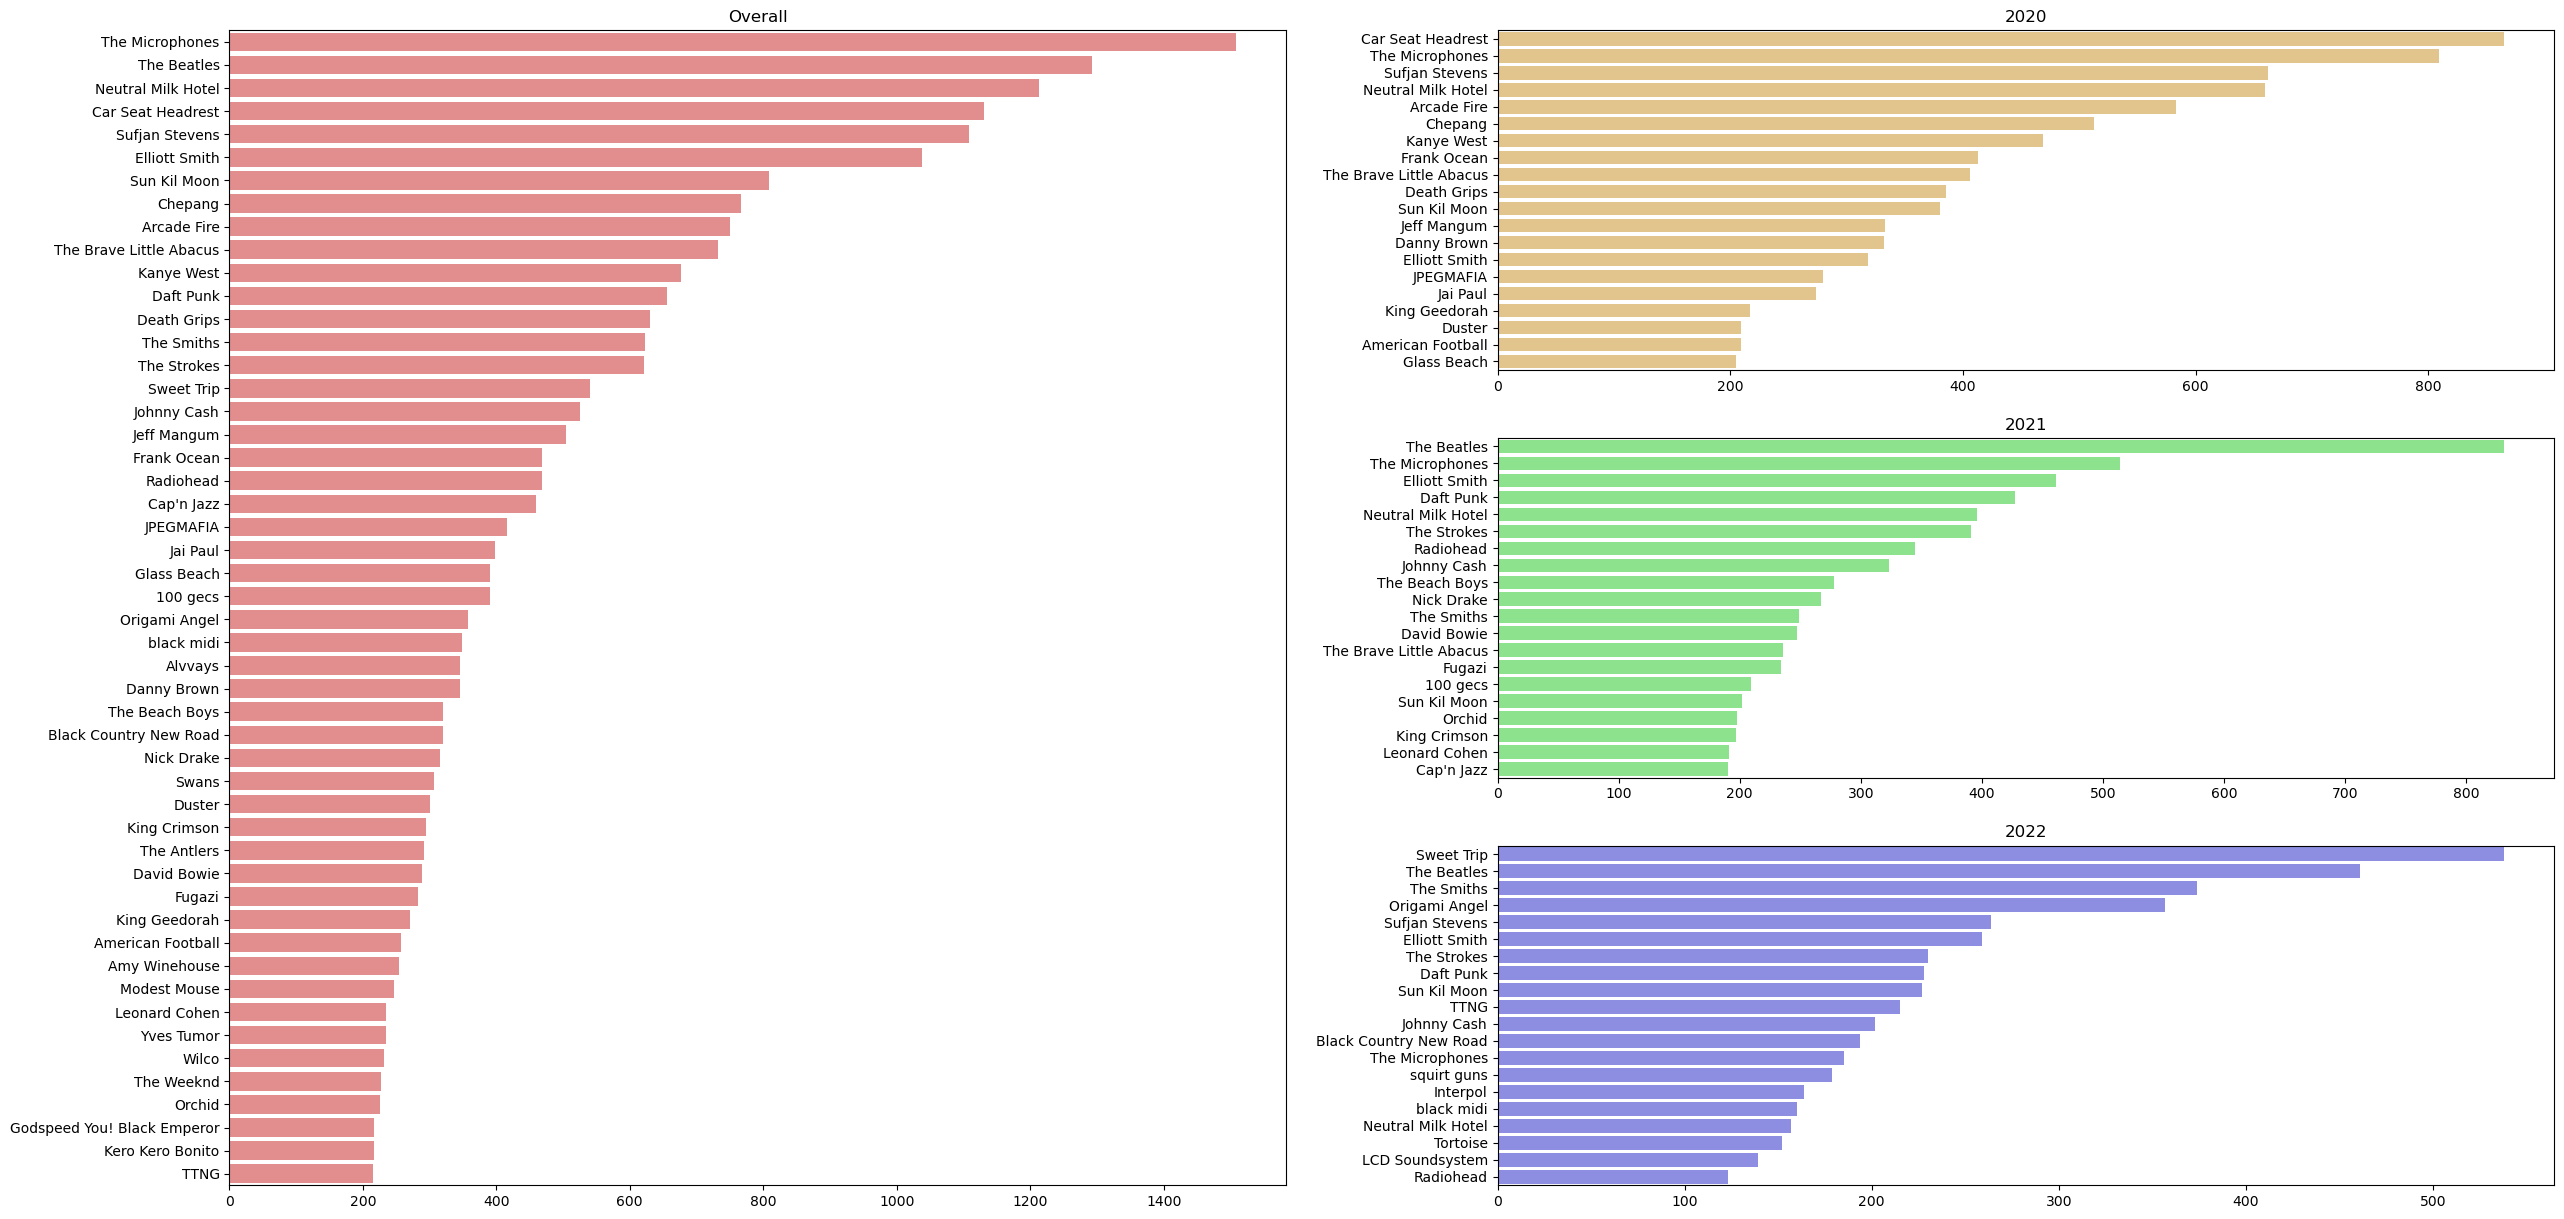

In [6]:
fig = plt.figure(figsize=(30, 15))

#Divide the plot into two columns
gs0 = gridspec.GridSpec(1, 2)
#First column with only 1 plot
gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs0[0])
#Second column with 3 rows for the plots
gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1])

#Overall Top 50
ax00 = plt.subplot(gs00[0, 0])
top = scrob['Artist'].value_counts()[:50]
sns.barplot(x = top.values, y = top.index, color = '#f08080')
ax00.set_title('Overall')

#Top 20 in 2020
ax01 = plt.subplot(gs01[0, 0])
top_20 = scrob_2020['Artist'].value_counts()[:20]
sns.barplot(x = top_20.values, y = top_20.index, color='#f0ca7f')
ax01.set_title('2020')

#Top 20 in 2021
ax01 = plt.subplot(gs01[1, 0])
top_21 = scrob_2021['Artist'].value_counts()[:20]
sns.barplot(x = top_21.values, y = top_21.index, color='#7ff07f')
ax01.set_title('2021')

#Top 20 in 2020
ax01 = plt.subplot(gs01[2, 0])
top_22 = scrob_2022['Artist'].value_counts()[:20]
sns.barplot(y=top_22.index, x=top_22.values, color="#7f7ff0")
ax01.set_title('2022')